In [55]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas   as pd
import seaborn  as sns
import numpy    as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


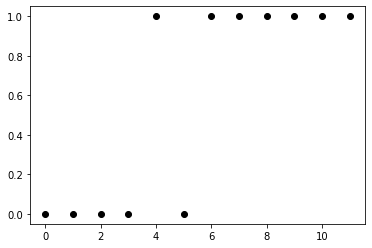

In [57]:
X = np.arange(12).reshape(-1, 1)
Y = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1])

plt.plot(X, Y, 'ko')

[[0.91709816]]


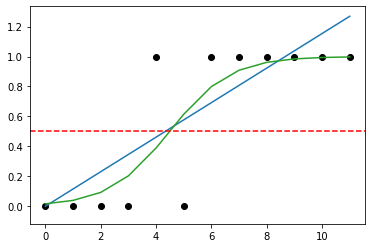

In [ ]:
# Regressão linear
model = linear_model.LinearRegression()
model.fit(X, Y)
# - - - - - - - - - - - - - - - - - - - - - - - - 

# Regrassão logística
RLog  = linear_model.LogisticRegression()
RLog.fit(X, Y)
# - - - - - - - - - - - - - - - - - - - - - - - - 

print(RLog.coef_)

# Função sigmoide
sigmoide = expit(X*RLog.coef_ + RLog.intercept_).ravel()
# - - - - - - - - - - - - - - - - - - - - - - - - 

plt.plot(X, Y, 'ko')
plt.plot(X, X * model.coef_, model.intercept_)
plt.plot(X, sigmoide)
plt.axhline(0.5, color = 'r', linestyle = 'dashed')


# Análise de risco

In [ ]:
%cd /content/drive/MyDrive/Workspace/UFERSA/2022.1/Aprendizado de máquina/bases/

/content/drive/MyDrive/Workspace/UFERSA/2022.1/Aprendizado de máquina/bases


In [ ]:
dfRisco = pd.read_csv('./exemplo2.csv')
dfRisco.head()

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom


In [54]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Transformando dados categóricos em numéricos
le = LabelEncoder()
dfRisco['risco'] = le.fit_transform(dfRisco['risco'])

X_train, X_test, y_train, y_test = train_test_split(dfRisco.drop(columns=['risco']), dfRisco['risco'],test_size=0.33, stratify=dfRisco['risco'])
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Regressão linear
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Regrassão logística
RLog  = linear_model.LogisticRegression()
RLog.fit(X_train, y_train)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Avaliando acurácia dos métodos
linearPred = model.predict(X_test)
logPred    = RLog.predict(X_test)

print(f"Acurácia regressão linear    : {(model.score(X_test, y_test) * 100):.2f} %")
print(f"Acurácia regressão logistica : {(RLog.score(X_test, y_test) * 100):.2f} %")
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Acurácia regressão linear    : 11.90 %
Acurácia regressão logistica : 67.15 %
